# Non-Linear Regression

In [91]:
import numpy as np
import pandas as pd

import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf  #Provides a formula-based interface

%matplotlib inline
#plt.style.use('seaborn-white')

homedir=os.environ['HOME'] + '/'
datapath=homedir+ "datasets/"
autompgfile=datapath + "auto-mpg.csv"

## Load dataset, read metadata

In [92]:
dataset_org = pd.read_csv(autompgfile)
#dataset_org

In [93]:
dataset = dataset_org
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [94]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

### Quick basics check

In [95]:
import pandas as pd
import numpy as np

data = {'col1': [1, 2, 3, 4], 
        'col2': [5, 6, 7, 8],
        'col3': [9, 10, 11, 12]}
df = pd.DataFrame(data, index=['row1', 'row2', 'row3', 'row4'])
print("Original DataFrame:")
print(df)
print("-" * 20)
 

Original DataFrame:
      col1  col2  col3
row1     1     5     9
row2     2     6    10
row3     3     7    11
row4     4     8    12
--------------------


In [96]:
for index, row in df.iterrows():
    for column_name, value in row.items():
        print(f"({index}, {column_name}): {value}", end=" | ")
    print()

(row1, col1): 1 | (row1, col2): 5 | (row1, col3): 9 | 
(row2, col1): 2 | (row2, col2): 6 | (row2, col3): 10 | 
(row3, col1): 3 | (row3, col2): 7 | (row3, col3): 11 | 
(row4, col1): 4 | (row4, col2): 8 | (row4, col3): 12 | 


In [97]:
# row.items() returns tuples of (column_name, value)
# hence unpack to access only value
for index, row in df.iterrows():    
    for column_name, value in row.items():
        if value == 7:
            print(f"{column_name} -> {value} ", end=" | ")
    print()



col2 -> 7  | 



### Back to ...

#### Replace any invalid with NAN

In [98]:
from numpy import nan
dataset.replace('?', nan, inplace=True)
print(f"dataset size -> {dataset.shape}")

dataset size -> (398, 9)


#### Remove all NANs if any

In [99]:
dataset = dataset.dropna()
print(f"dataset size -> {dataset.shape}")

dataset size -> (392, 9)


#### Convert object datatype to float

In [100]:
dataset["horsepower"] = dataset["horsepower"].astype(float)
dataset.dtypes

/tmp/ipykernel_6395/3639531622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["horsepower"] = dataset["horsepower"].astype(float)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

#### Plots using {`mpg`, `horsepower` (inde)

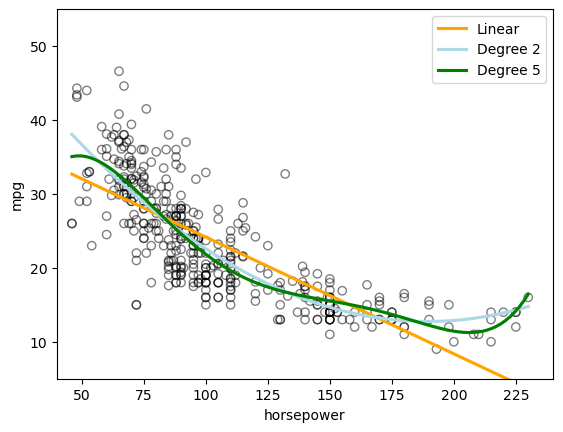

In [101]:
plt.scatter(dataset.horsepower, dataset.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x=dataset.horsepower, y=dataset.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x=dataset.horsepower, y=dataset.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x=dataset.horsepower, y=dataset.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
#sns.regplot(x=dataset1.horsepower, y=dataset1.mpg, ci=None, label='Degree 70', order=70, scatter=False, color='r')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);


#### Creating new column `(2nd Degree)`

In [102]:
dataset['horsepower2'] = dataset.loc[:, "horsepower"]**2
#dataset.head()

/tmp/ipykernel_6395/1730658876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['horsepower2'] = dataset.loc[:, "horsepower"]**2


### STATS Model Package

#### Using 1st Degree

In [103]:
auto_stats = smf.ols('mpg ~ horsepower ', dataset).fit()

In [104]:
auto_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           7.03e-81
Time:                        14:40:07   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using 2nd Degree

In [105]:
# add horsepower2 to the mix
auto_stats = smf.ols('mpg ~ horsepower + horsepower2', dataset).fit()
auto_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           5.40e-99
Time:                        14:40:07   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
# add weight to the mix
auto_stats = smf.ols('mpg ~ horsepower + horsepower2 + weight', dataset).fit()
auto_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     367.4
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          5.69e-113
Time:                        14:40:07   Log-Likelihood:                -1097.4
No. Observations:                 392   AIC:                             2203.
Df Residuals:                     388   BIC:                             2219.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      55.9864      1.649     33.953      0.000      52.744      59.228
horsepower     -0.2838      0.035     -8.067      0.000      -0.353      -0.215
horsepower2     0.0008      0.000      7.040      0.000       0.001       0.001
weight         -0.0045      0.001     -8.809      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       22.222   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.939
Skew:                           0.433   Prob(JB):                     1.16e-07
Kurtosis:                       4.097   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### NLR Using `scikitlearn`

In [107]:
regr = skl_lm.LinearRegression()

#### LR model using `horsepower` to predict `mpg`

In [108]:
# Linear fit mpg= b0+ hp *b1
# reshape horsepower variable to (n row * 1 col)
X = dataset.horsepower.values.reshape(-1,1)
Y = dataset.mpg
regr.fit(X, Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Predictions and Residuals

In [109]:
dataset['pred1'] = regr.predict(X)
dataset['resid1'] = dataset.mpg - dataset.pred1


/tmp/ipykernel_6395/2682790304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pred1'] = regr.predict(X)
/tmp/ipykernel_6395/2682790304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['resid1'] = dataset.mpg - dataset.pred1


#### NLR - Quadratic Fit

In [110]:
# Quadratic fit  mpg= b0+ hp *b1 + b2 * hp^2
W = dataset[['horsepower', 'horsepower2']].values
regr.fit(W, Y)

dataset['pred2'] = regr.predict(W)
dataset['resid2'] = dataset.mpg - dataset.pred2

dataset

/tmp/ipykernel_6395/2059324773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pred2'] = regr.predict(W)
/tmp/ipykernel_6395/2059324773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['resid2'] = dataset.mpg - dataset.pred2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower2,pred1,resid1,pred2,resid2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,19.416046,-1.416046,17.091508,0.908492
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,13.891480,1.108520,13.480156,1.519844
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,16.259151,1.740849,14.658717,3.341283
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0,16.259151,-0.259151,14.658717,1.341283
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0,17.837598,-0.837598,15.752059,1.247941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,7396.0,26.361214,0.638786,25.908837,1.091163
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,2704.0,31.727935,12.272065,35.985609,8.014391
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,7056.0,26.676903,5.323097,26.422834,5.577166
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,6241.0,27.466127,0.533873,27.750895,0.249105


#### Plots - `Linear Fit` and `Quadratic Fit`

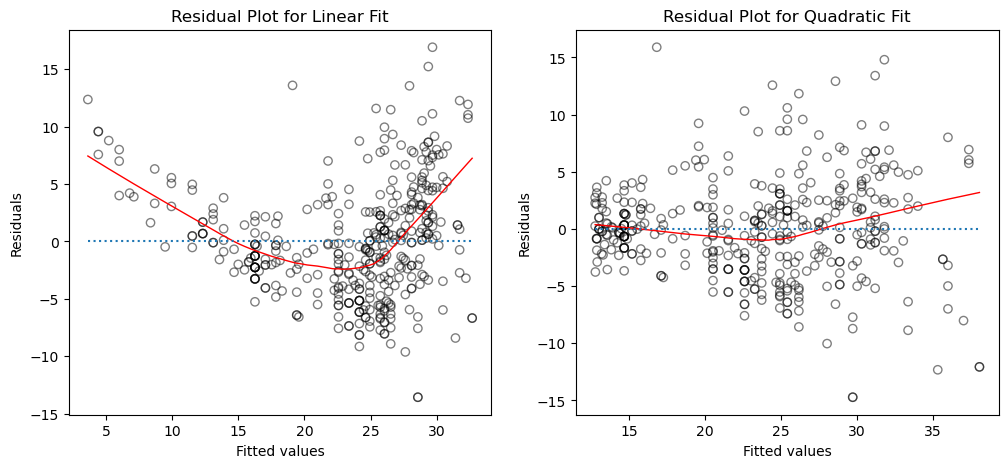

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(x=dataset.pred1, y=dataset.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(x=dataset.pred2, y=dataset.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')